In [20]:
import json
import pandas as pd
from konlpy.tag import Okt # komoran, han, kkma
from jamo import h2j, j2hcj
import re

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tqdm.notebook import tqdm
import numpy as np

In [48]:
li = []
for i in range(1, 6):
    with open(r'.\data\train\labled\talksets-train-' + str(i) + '.json') as f:
        data = json.load(f)
    for d in data:
        for s in d['sentences']:
            li.append([s['origin_text'], s['is_immoral'], s['intensity'], 
                    'CENSURE' in s['types'], 'HATE' in s['types'], 'DISCRIMINATION' in s['types'], 
                    'SEXUAL' in s['types'], 'ABUSE' in s['types'], 'VIOLENCE' in s['types'], 'CRIME' in s['types']])
            
train = pd.DataFrame(li, columns=['text', 'immoral', 'intensity', 'CENSURE', 'HATE', 'DISCRIMINATION', 'SEXUAL', 'ABUSE', 'VIOLENCE', 'CRIME'])
train['text'] = train['text'].apply(lambda x : re.sub('#@.+?#', '', x.replace('#@#', '')))
train

,text,immoral,intensity,CENSURE,HATE,DISCRIMINATION,SEXUAL,ABUSE,VIOLENCE,CRIME
0,부랴부랴왔는데아무도안왔네.시간개념들이없네,True,2.0,True,False,False,False,False,False,False
1,맞아.사람들이진짜개념이없다,True,2.0,True,False,False,False,False,False,False
2,저렇게는살지말아야지,True,2.0,True,False,False,False,False,False,False
3,그러게게으르고멍청한사람들은맞아야해,True,2.0,True,False,False,False,False,False,False
4,인방보는남자는거르는게맞다,True,1.0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
363149,뷔응신처럼죽지도못하면서괜히뛰어들기는,True,1.4,True,False,False,False,False,False,False
363150,오죽하면그러겠나,False,0.0,False,False,False,False,False,False,False
363151,너얼굴보면한숨나온다.,True,1.6,True,False,False,False,False,False,False
363152,신경끄세요.,False,0.0,False,False,False,False,False,False,False


In [49]:
li = []
with open(r'.\data\valid\labled\talksets-train-6.json') as f:
    data = json.load(f)
for d in data:
    for s in d['sentences']:
        li.append([s['origin_text'], s['is_immoral'], s['intensity'], 
                'CENSURE' in s['types'], 'HATE' in s['types'], 'DISCRIMINATION' in s['types'], 
                'SEXUAL' in s['types'], 'ABUSE' in s['types'], 'VIOLENCE' in s['types'], 'CRIME' in s['types']])
test = pd.DataFrame(li, columns=['text', 'immoral', 'intensity', 'CENSURE', 'HATE', 'DISCRIMINATION', 'SEXUAL', 'ABUSE', 'VIOLENCE', 'CRIME'])

test['text'] = test['text'].apply(lambda x : re.sub('#@.+?#', '', x.replace('#@#', '')))
test

,text,immoral,intensity,CENSURE,HATE,DISCRIMINATION,SEXUAL,ABUSE,VIOLENCE,CRIME
0,명절이면좀일찍마쳐주지,False,0.0,False,False,False,False,False,False,False
1,원래틀딱들은눈치가없어서ㅋㅋㅋ,True,1.4,True,True,False,False,False,False,False
2,저나이먹고저렇게눈치없는것도재주다,True,1.0,True,False,False,False,False,False,False
3,요즘은왜미세먼지가별로없지?,False,0.0,False,False,False,False,False,False,False
4,호주랑중국이랑싸우고있어서중국에서호주산석탄을수입안해서그렇대,False,0.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
45210,저여자는오늘도레깅스입네,False,0.0,False,False,False,False,False,False,False
45211,남자아래에깔려서당하고싶은건가?,True,1.8,False,False,False,False,False,True,False
45212,"휴유,내가봐준다뒷태가끝내주는데!",False,0.0,False,False,False,False,False,False,False
45213,저정도면놀아달라는거아닌가?저라인봐봐만지면으스러지겠어,True,1.8,False,False,False,True,False,False,False


In [50]:
train.to_csv(r'data/train.csv', index = False)
# train = pd.read_csv(r'data/train.csv')
test.to_csv(r'data/test.csv', index = False)
# test = pd.read_csv(r'data/test.csv')

In [53]:
train_list = train['text'].apply(lambda x : j2hcj(h2j(x)))
test_list = test['text'].apply(lambda x : j2hcj(h2j(x)))

In [60]:
train_list_2 = []
for a_t in train_list:
    train_list_2.append(list(a_t))

test_list_2 = []
for a_t in test_list:
    test_list_2.append(list(a_t))

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_list_2) # 단어 인덱스 구축
text_sequences = tokenizer.texts_to_sequences(train_list_2) # 문자열 -> 인덱스 리스트
                                                            # '나는 천재다 나는 멋있다' -> [1, 2, 1, 3]
# train data로 fit 시켜준 tokenizer로 test data도 인덱스로 변경
text_sequences_test = tokenizer.texts_to_sequences(test_list_2)

word_vocab = tokenizer.word_index # 딕셔너리 형태
print("전체 단어 개수: ", len(word_vocab)) # 전체 단어 개수 확인

전체 단어 개수:  148


In [70]:
MAX_SEQUENCE_LENGTH = 100 # 문장 최대 길이

X_train = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre') # 문장의 길이가 50 단어가 넘어가면 자르고, 모자르면 0으로 채워 넣는다.
y_train = np.array(train['intensity']) # 각 리뷰의 감정을 넘파이 배열로 만든다.

X_test = pad_sequences(text_sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding='pre') # 문장의 길이가 50 단어가 넘어가면 자르고, 모자르면 0으로 채워 넣는다.
y_test = np.array(test['intensity']) # 각 리뷰의 감정을 넘파이 배열로 만든다.

print('Shape of train input data tensor:', X_train.shape) # 리뷰 데이터의 형태 확인
print('Shape of train label tensor:', y_train.shape) # 감정 데이터 형태 확인
print('Shape of test input data tensor:', X_test.shape) # 리뷰 데이터의 형태 확인
print('Shape of test label tensor:', y_test.shape) # 감정 데이터 형태 확인

Shape of train input data tensor: (363154, 70)
Shape of train label tensor: (363154,)
Shape of test input data tensor: (45215, 70)
Shape of test label tensor: (45215,)


In [71]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from tensorflow.keras import layers, models

model = Sequential()
model.add(Embedding(len(word_vocab)+1, 30)) # (단어집합의 크기, 임베딩 후 벡터 크기)

model.add(layers.GRU(units=30,input_shape =(MAX_SEQUENCE_LENGTH, 30),return_sequences = True))
model.add(layers.GRU(units=15,input_shape =(MAX_SEQUENCE_LENGTH, 30),return_sequences = True))
model.add(layers.GRU(units=10))

model.add(layers.Dense(3))
model.add(layers.Dense(1)) # 출력을 위한 FFN


model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mse'])
# 이진 분류이므로 손실함수는 binary_crossentropy 사용, 에폭마다 정확도를 보기 위해 accuracy 적용
print(model.summary()) #모델 아키텍처 출력

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 30)          4470      
                                                                 
 gru (GRU)                   (None, None, 30)          5580      
                                                                 
 gru_1 (GRU)                 (None, None, 15)          2115      
                                                                 
 gru_2 (GRU)                 (None, 10)                810       
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13,012
Trainable params: 13,012
Non-trai

In [72]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs= 100, batch_size = 100, validation_split=0.2, callbacks=[early])


Epoch 1/100
2906/2906 [==============================] - 181s 61ms/step - loss: 0.5619 - mse: 0.5619 - val_loss: 0.4789 - val_mse: 0.4789
Epoch 2/100
2906/2906 [==============================] - 178s 61ms/step - loss: 0.5279 - mse: 0.5279 - val_loss: 0.4507 - val_mse: 0.4507
Epoch 3/100
2906/2906 [==============================] - 176s 60ms/step - loss: 0.5066 - mse: 0.5066 - val_loss: 0.4546 - val_mse: 0.4546
Epoch 4/100
2906/2906 [==============================] - 175s 60ms/step - loss: 0.4870 - mse: 0.4870 - val_loss: 0.4389 - val_mse: 0.4389
Epoch 5/100
2906/2906 [==============================] - 175s 60ms/step - loss: 0.4693 - mse: 0.4693 - val_loss: 0.4022 - val_mse: 0.4022
Epoch 6/100
2906/2906 [==============================] - 175s 60ms/step - loss: 0.4547 - mse: 0.4547 - val_loss: 0.4310 - val_mse: 0.4310
Epoch 7/100
2906/2906 [==============================] - 179s 61ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.3970 - val_mse: 0.3970
Epoch 8/100
2906/2906 [===========

In [90]:
model.evaluate(pred_y, y_test)

1413/1413 [==============================] - 3s 1ms/step - loss: 0.4290 - mse: 0.4290


[0.4290047883987427, 0.4290047883987427]

In [73]:
model.save('version1.h5')
# new_model = tf.keras.models.load_model('version1.h5')

In [74]:
pred_y = model.predict(X_test)

1413/1413 [==============================] - 25s 18ms/step


In [91]:
pred_y_train = model.predict(X_train)

11349/11349 [==============================] - 182s 16ms/step


In [83]:
test['pred'] = pred_y
test[['text', 'immoral', 'intensity', 'pred', 'CENSURE', 'HATE', 'DISCRIMINATION',
       'SEXUAL', 'ABUSE', 'VIOLENCE', 'CRIME']]

,text,immoral,intensity,pred,CENSURE,HATE,DISCRIMINATION,SEXUAL,ABUSE,VIOLENCE,CRIME
0,명절이면좀일찍마쳐주지,False,0.0,1.014786,False,False,False,False,False,False,False
1,원래틀딱들은눈치가없어서ㅋㅋㅋ,True,1.4,1.464311,True,True,False,False,False,False,False
2,저나이먹고저렇게눈치없는것도재주다,True,1.0,1.134663,True,False,False,False,False,False,False
3,요즘은왜미세먼지가별로없지?,False,0.0,0.136485,False,False,False,False,False,False,False
4,호주랑중국이랑싸우고있어서중국에서호주산석탄을수입안해서그렇대,False,0.0,0.259939,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
45210,저여자는오늘도레깅스입네,False,0.0,0.382613,False,False,False,False,False,False,False
45211,남자아래에깔려서당하고싶은건가?,True,1.8,1.123744,False,False,False,False,False,True,False
45212,"휴유,내가봐준다뒷태가끝내주는데!",False,0.0,0.525188,False,False,False,False,False,False,False
45213,저정도면놀아달라는거아닌가?저라인봐봐만지면으스러지겠어,True,1.8,1.077605,False,False,False,True,False,False,False


In [95]:
train['pred_imm'] = pred_y_train > 0

<Axes: >

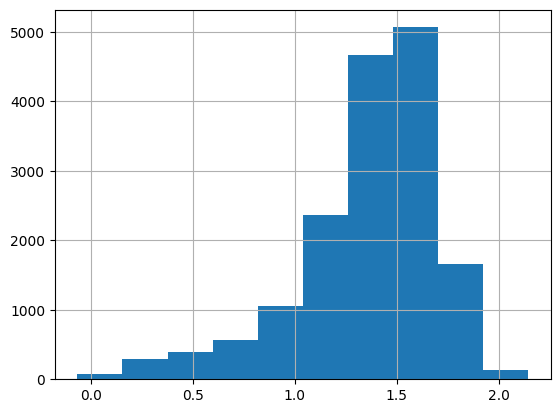

In [94]:
train[train['ABUSE'] ==True]['pred'].hist()

In [105]:

from sklearn.metrics import classification_report

for i in np.arange(0, 1.5, 0.1):
    train['pred_imm'] = pred_y_train > i
    print(i)
    print(classification_report(train['immoral'], train['pred_imm']))
    print('='*25)

0.0
              precision    recall  f1-score   support

       False       0.98      0.02      0.04    162948
        True       0.56      1.00      0.71    200206

    accuracy                           0.56    363154
   macro avg       0.77      0.51      0.37    363154
weighted avg       0.75      0.56      0.41    363154

0.1
              precision    recall  f1-score   support

       False       0.96      0.15      0.26    162948
        True       0.59      1.00      0.74    200206

    accuracy                           0.61    363154
   macro avg       0.78      0.57      0.50    363154
weighted avg       0.76      0.61      0.52    363154

0.2
              precision    recall  f1-score   support

       False       0.93      0.31      0.47    162948
        True       0.64      0.98      0.77    200206

    accuracy                           0.68    363154
   macro avg       0.78      0.65      0.62    363154
weighted avg       0.77      0.68      0.64    363154

0.30000

In [102]:
train[train['pred_imm'] == False]

,text,immoral,intensity,CENSURE,HATE,DISCRIMINATION,SEXUAL,ABUSE,VIOLENCE,CRIME,pred,pred_imm
29,"이번에유뷰트봤는데,3차선에서역주행하는차가있데",False,0.0,False,False,False,False,False,False,False,-0.021931,False
479,아친구여친임신했대,False,0.0,False,False,False,False,False,False,False,-0.016142,False
541,"어,무슨일인데?",False,0.0,False,False,False,False,False,False,False,-0.020002,False
586,응맞는데?,False,0.0,False,False,False,False,False,False,False,-0.001176,False
593,왜또무슨일터졌어?,False,0.0,False,False,False,False,False,False,False,-0.003683,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362767,나어제본알바면접합격했어,False,0.0,False,False,False,False,False,False,False,-0.007526,False
362972,어제연설봤어?,False,0.0,False,False,False,False,False,False,False,-0.013307,False
363031,나문신할까?,False,0.0,False,False,False,False,False,False,False,-0.003999,False
363045,어떻게됐어?,False,0.0,False,False,False,False,False,False,False,-0.011894,False


In [ ]:
true 200206 
False 162948